# Predicting car prices using K-nearest neighbors regression

Dataset documentation: https://archive.ics.uci.edu/ml/datasets/automobile

Columns:
1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.



In [1]:
import pandas as pd
pd.options.display.max_columns = None

header_row = ["symboling","normalized-losses",'make','fuel-type','aspiration',
              'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
             'length','width','height','curb-weight','engine-type','num-of-cylinders',
             'engine-size','fuel-system','bore','stroke','compression-rate','horsepower',
             'peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv("imports-85.csv", names=header_row)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

num_cars = cars[continuous_values_cols]

num_cars.head(10)



,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
import numpy as np
num_cars = num_cars.replace("?",np.nan)
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Determine which columns are not yet numeric

num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [5]:
num_cars['normalized-losses'] = pd.to_numeric(num_cars['normalized-losses'],errors='coerce')

print("num rows: {}".format(num_cars.shape[0]))
print(num_cars.isnull().sum())

num rows: 205
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [6]:
#drop all rows where price is null as this is what we are trying to predict
num_cars = num_cars.dropna(subset=['price'])
print(num_cars.isnull().sum())

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


In [7]:
# convert to numeric

non_num_cars = num_cars.select_dtypes(np.object)
for each in non_num_cars:
    num_cars[each] = pd.to_numeric(non_num_cars[each],errors='coerce')
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [8]:
print(num_cars.isnull().sum())

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


In [9]:
num_cars.fillna(num_cars.mean(),inplace=True)

print(num_cars.isnull().sum())

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [10]:
price = num_cars['price']
num_cars = (num_cars - num_cars.min()) / (num_cars.max() - num_cars.min())
num_cars['price'] = price
num_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430


# Univariate analysis

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def shuf_part_df(df, train_fraction):    
    new_df = df.copy()
    
    np.random.seed(1)
    new_df = new_df.iloc[np.random.permutation(new_df.shape[0])]

    sep_idx = int(new_df.shape[0]*train_fraction)
    train_df = new_df.iloc[:sep_idx]
    test_df = new_df.iloc[sep_idx:]
    return train_df, test_df

def knn_train_test(train_col, target_col, df):
    train_df, test_df = shuf_part_df(df, 0.85)
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]],train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col],predictions)
    return (mse ** 0.5)

In [12]:
rmses = {}

for each in num_cars:
    if 'price' in each:
        continue
    rmse = knn_train_test(each,'price',num_cars)
    rmses[each] = rmse
    
rmse_series = pd.Series(rmses)
rmse_series.sort_values(inplace = True)
rmse_series

curb-weight          2800.534237
city-mpg             3912.281126
width                4302.322649
highway-mpg          4312.481977
wheel-base           4658.747516
horsepower           5300.169603
length               5957.402736
compression-rate     6254.584101
bore                 6783.404511
peak-rpm             7001.646376
stroke               7366.187605
height               7429.755426
normalized-losses    7587.138470
dtype: float64

In [13]:
def knn_train_test(train_col, target_col, df, k_values):
    train_df, test_df = shuf_part_df(df, 0.85)
    rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]],train_df[target_col])
        predictions =knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col],predictions)
        rmses[k] = mse ** 0.5
    return rmses

In [14]:
rmse_values = {}
k_values = list(range(1,11,2))
for each in num_cars:
    if 'price' in each:
        continue
    rmse_values[each] = knn_train_test(each,'price',num_cars,k_values)
        
rmse_values

{'bore': {1: 7811.341861512615,
  3: 7490.10042737655,
  5: 6783.404511010676,
  7: 7746.073643894855,
  9: 7189.6635359836655},
 'city-mpg': {1: 4243.636340109361,
  3: 3874.4048570607292,
  5: 3912.2811255278284,
  7: 3789.3005976158056,
  9: 3892.27104780715},
 'compression-rate': {1: 9046.04138693791,
  3: 6132.725891495155,
  5: 6254.584100765484,
  7: 6226.404681467965,
  9: 6365.838514292034},
 'curb-weight': {1: 2860.0571841790493,
  3: 3034.5076020825472,
  5: 2800.5342368221286,
  7: 2990.1414300263855,
  9: 3315.2985004299994},
 'height': {1: 8275.706542295562,
  3: 7090.453814636341,
  5: 7429.755426357175,
  7: 7207.673968866423,
  9: 7247.612743537472},
 'highway-mpg': {1: 3151.4800977400464,
  3: 4104.157748475655,
  5: 4312.481977372345,
  7: 4495.796894535943,
  9: 4920.413797585154},
 'horsepower': {1: 4165.769494807768,
  3: 4895.793104478967,
  5: 5300.169602764096,
  7: 5557.193880566113,
  9: 5482.567836991737},
 'length': {1: 6299.758758822027,
  3: 5999.38032911

In [15]:
import matplotlib.pyplot as plt
 
for k,v in rmse_values.items():
    y = v.values()
    plt.scatter(k_values,y)
    plt.xlabel("k values")
    plt.ylabel("root mean squared error")
plt.show()

for k,v in rmse_values.items():
    y = v.values()
    plt.plot(k_values,y)
    plt.xlabel("k values")
    plt.ylabel("root mean squared error")

plt.show()

# Multivariate analysis

In [75]:
def fold_partition(df, folds):
    df = df.reset_index()
    np.random.seed(1)
    new_df = df.copy()
    new_df = new_df.loc[np.random.permutation(new_df.shape[0])]
    new_df = new_df.reset_index()
    step = int(new_df.shape[0]/folds)
    for i, each in enumerate(range(folds)):
        start_idx = i * step
        end_idx = (i + 1) *step
        if (i + 1 == folds):
            end_idx = new_df.shape[0]
        new_df.loc[start_idx:end_idx,'fold'] = int(i+1)
    return new_df

In [76]:
df = fold_partition(num_cars.iloc[:10],4)
for each in range(1,5):
    train_df = df[df['fold'] != each]
    test_df = df[df["fold"] == each]
    print("Test for fold {}: {}\n\n".format(each,test_df['price']))


Test for fold 1: 0    16500
1    16430
Name: price, dtype: int64


Test for fold 2: 2    17710
3    17450
Name: price, dtype: int64


Test for fold 3: 4    13495
5    13950
Name: price, dtype: int64


Test for fold 4: 6    16500
7    18920
8    23875
9    15250
Name: price, dtype: int64




In [77]:
def knn_train_test_multi(train_cols,target_col,df,**kwargs):
    options = {"k_values": [5],"folds": 2}
    options.update(kwargs)
    
    folds = options["folds"]
    part_df = fold_partition(df,folds)
    

    rmses = {}

    for k in options["k_values"]:
        rmses_for_k = []
        for each in range(1,folds+1):
            train_df = part_df[part_df['fold'] != each]
            test_df = part_df[part_df["fold"] == each]

            knn = KNeighborsRegressor(k)
            knn.fit(train_df[train_cols],train_df[target_col])
            predictions = knn.predict(test_df[train_cols])
            rmses_for_k.append(mean_squared_error(test_df[target_col],predictions) ** 0.5)
        rmses[k] = np.mean(rmses_for_k)

    return rmses

In [78]:
# Pick best cols based on previous analysis

rmse_avg = {}
for k,v in rmse_values.items():
    values = list(v.values())
    rmse_avg[k] = np.mean(values)
rmse_avg_series = pd.Series(rmse_avg)
rmse_avg_series.sort_values(inplace=True)
print(rmse_avg_series)

curb-weight          3000.107791
width                3934.649626
city-mpg             3942.378794
highway-mpg          4196.866103
wheel-base           4438.886039
horsepower           5080.298784
length               5723.131064
compression-rate     6805.118915
bore                 7404.116796
height               7450.240499
stroke               7563.217264
peak-rpm             7624.532483
normalized-losses    7784.321206
dtype: float64


In [90]:
k_rmse_results = {}

two_best_features = ['curb-weight', 'width']
rmse_val = knn_train_test_multi(['bore'], 'price', num_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['curb-weight', 'width', 'city-mpg']
rmse_val = knn_train_test_multi(three_best_features, 'price', num_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['curb-weight', 'width', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test_multi(four_best_features, 'price', num_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['curb-weight', 'width', 'city-mpg' , 'highway-mpg' , 'wheel-base']
rmse_val = knn_train_test_multi(five_best_features, 'price', num_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['curb-weight', 'width', 'city-mpg' , 'highway-mpg' , 'wheel-base', 'horsepower']
rmse_val = knn_train_test_multi(six_best_features, 'price', num_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results


{'five best features': {5: 3704.10635235262},
 'four best features': {5: 3556.5221505128684},
 'six best features': {5: 3746.895367608381},
 'three best features': {5: 3543.359676647549},
 'two best features': {5: 6489.68548529534}}

In [92]:
k_rmse_results = {}
k_values = list(range(1,26))

rmse_val = knn_train_test_multi(two_best_features, 'price', num_cars, k_values=k_values)
k_rmse_results["two best features"] = rmse_val

rmse_val = knn_train_test_multi(three_best_features, 'price', num_cars, k_values=k_values)
k_rmse_results["three best features"] = rmse_val

rmse_val = knn_train_test_multi(four_best_features, 'price', num_cars, k_values=k_values)
k_rmse_results["four best features"] = rmse_val

rmse_val = knn_train_test_multi(five_best_features, 'price', num_cars, k_values=k_values)
k_rmse_results["five best features"] = rmse_val

rmse_val = knn_train_test_multi(six_best_features, 'price', num_cars, k_values=k_values)
k_rmse_results["six best features"] = rmse_val

k_rmse_results


{'five best features': {1: 3571.558734854397,
  2: 3783.093644772786,
  3: 3612.855248298926,
  4: 3609.241184271011,
  5: 3704.10635235262,
  6: 3937.3705235647303,
  7: 4095.2393247015634,
  8: 4174.153530887664,
  9: 4258.893881545504,
  10: 4237.604831978224,
  11: 4357.61532594333,
  12: 4394.462267989378,
  13: 4475.914306848148,
  14: 4550.9782693681445,
  15: 4624.3657433865865,
  16: 4676.192989464271,
  17: 4740.249431776898,
  18: 4795.723485687133,
  19: 4866.806683977786,
  20: 4914.628114380117,
  21: 4959.874158442847,
  22: 4974.612731768283,
  23: 5057.081145447961,
  24: 5099.53694639469,
  25: 5132.155270592169},
 'four best features': {1: 3707.8187123645293,
  2: 3381.380189835409,
  3: 3405.7707600519802,
  4: 3529.96278669401,
  5: 3556.5221505128684,
  6: 3691.0486472075363,
  7: 3795.6827453577225,
  8: 3833.748449432218,
  9: 3953.1873248181955,
  10: 4076.532527642019,
  11: 4167.971443037926,
  12: 4289.067088579688,
  13: 4360.1841018248615,
  14: 4419.69938

Min for two best features: 6
Min for three best features: 3
Min for four best features: 2
Min for five best features: 1
Min for six best features: 1


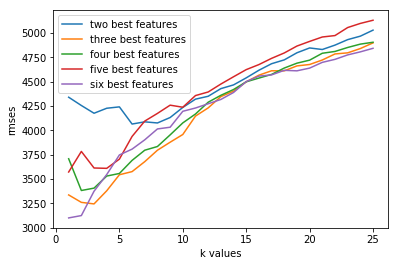

In [93]:
k_values = list(range(1,26))
for k,v in k_rmse_results.items():
    y = list(v.values())
    plt.plot(k_values,y,label=k)
    plt.xlabel("k values")
    plt.ylabel("rmses")
    print("Min for {}: {}".format(k,k_values[y.index(np.min(y))]))
plt.legend(loc="upper left")
plt.show()

In [94]:
# Testing effect of varying folds using five best features and k from 1-5
k_rmse_results = {}
k_values = list(range(1,5))
folds = list(range(2,7))
for each in folds:
    
    rmse_val = knn_train_test_multi(five_best_features, 'price', num_cars, k_values=k_values,folds=each)
    k_rmse_results["{} folds".format(each)] = rmse_val


k_rmse_results

{'2 folds': {1: 3571.558734854397,
  2: 3783.093644772786,
  3: 3612.855248298926,
  4: 3609.241184271011},
 '3 folds': {1: 2700.7223707146873,
  2: 3007.0386385006964,
  3: 3363.209948853648,
  4: 3463.764800168592},
 '4 folds': {1: 2847.1134758691715,
  2: 3181.331343954479,
  3: 3439.215053037365,
  4: 3688.7655474206604},
 '5 folds': {1: 2797.442093060442,
  2: 3045.278771542789,
  3: 3436.789652422417,
  4: 3644.7894735901036},
 '6 folds': {1: 2725.0227616096968,
  2: 2892.7569528479967,
  3: 3371.9429810651513,
  4: 3648.546005517559}}